In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\RER\Code\22.csv')
df

,Sending_Country,Receiving_Country,Year,Value,Unit,Source,Region,Sending_Country_Code,Receiving_Country_Code,Sending_Country_GDP,Receiving_Country_GDP
0,Algeria,Senegal,2021,0.183414825,USD millions,BCEAO,Africa,DZA,SEN,1.994889e+05,2.435960e+04
1,Australia,Ethiopia,2020,13.59617511,USD millions,National Bank of Ethiopia,Africa,AUS,ETH,1.491063e+06,9.507178e+04
2,Australia,Kenya,2024,"184,497.099695719",USD millions,Central Bank of Kenya,Africa,AUS,KEN,1.665258e+06,1.045752e+05
3,Australia,Uganda,2022,22,USD millions,Bank of Uganda,Africa,AUS,UGA,1.587133e+06,4.414722e+04
4,Austria,Kenya,2024,"13,169.065145833",USD millions,Central Bank of Kenya,Africa,AUT,KEN,4.181904e+05,1.045752e+05
...,...,...,...,...,...,...,...,...,...,...,...
3975,Suriname,United States,2019,5.022,USD millions,Roland Kpodar (IMF),North America,SUR,USA,5.256434e+03,2.015964e+07
3976,Suriname,United States,2020,3.275,USD millions,Roland Kpodar (IMF),North America,SUR,USA,4.416708e+03,1.972358e+07
3977,Suriname,Vietnam,2018,1.401,USD millions,Roland Kpodar (IMF),Asia,SUR,VNM,5.195769e+03,2.933586e+05
3978,Suriname,Vietnam,2019,1.453,USD millions,Roland Kpodar (IMF),Asia,SUR,VNM,5.256434e+03,3.149476e+05


In [2]:
# Install required packages if not already installed
import subprocess
import sys

def install_package(package):
    try:
        __import__(package.replace('-', '_'))
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install statsmodels for comprehensive regression analysis
install_package("statsmodels")

# Import required libraries
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Install Python Stargazer-like libraries
print("🌟 Installing Python libraries that replicate R's stargazer functionality...")

# 1. stargazer - Direct Python port of R's stargazer
try:
    install_package("stargazer")
    print("✅ stargazer installed successfully!")
except:
    print("⚠️ stargazer installation failed")

# 2. summary-tables - Another excellent alternative
try:
    install_package("summary-tables")
    print("✅ summary-tables installed successfully!")
except:
    print("⚠️ summary-tables installation failed")

# 3. regression-tables - Specialized for regression tables
try:
    install_package("regression-tables")
    print("✅ regression-tables installed successfully!")
except:
    print("⚠️ regression-tables installation failed")

# Import what we can
try:
    from stargazer.stargazer import Stargazer
    print("📊 Stargazer imported successfully!")
    stargazer_available = True
except ImportError:
    print("❌ Stargazer not available")
    stargazer_available = False

print("\n🎯 BEST OPTIONS FOR PYTHON STARGAZER:")
print("1. 'stargazer' - Direct port of R's stargazer")
print("2. 'summary-tables' - Clean, customizable tables") 
print("3. 'regression-tables' - Focused on regression output")
print("4. Built-in statsmodels summary with custom formatting")
print("\nLet's try these options below...")

🌟 Installing Python libraries that replicate R's stargazer functionality...
Installing stargazer...
✅ stargazer installed successfully!
Installing summary-tables...
⚠️ summary-tables installation failed
Installing regression-tables...
⚠️ regression-tables installation failed
📊 Stargazer imported successfully!

🎯 BEST OPTIONS FOR PYTHON STARGAZER:
1. 'stargazer' - Direct port of R's stargazer
2. 'summary-tables' - Clean, customizable tables
3. 'regression-tables' - Focused on regression output
4. Built-in statsmodels summary with custom formatting

Let's try these options below...


In [4]:
# Demonstrate Python stargazer usage
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Prepare the data (same as before)
print("📊 Preparing regression data...")

# Clean the Value column
df['Value_cleaned'] = df['Value'].astype(str).str.replace(',', '').str.replace('"', '')
df['Value_cleaned'] = pd.to_numeric(df['Value_cleaned'], errors='coerce')

# Remove rows with missing values
regression_data = df.dropna(subset=['Value_cleaned', 'Sending_Country_GDP', 'Receiving_Country_GDP'])
print(f"Dataset ready: {regression_data.shape[0]} observations")

# Prepare variables for regression
y = regression_data['Value_cleaned']
X = regression_data[['Sending_Country_GDP', 'Receiving_Country_GDP']]
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print("✅ Regression model fitted!")

# Try using Python stargazer if available
if stargazer_available:
    print("\n🌟 USING PYTHON STARGAZER LIBRARY:")
    print("=" * 60)
    
    try:
        # Create stargazer object
        stargazer = Stargazer([model])
        
        # Generate different output formats
        print("📋 TEXT OUTPUT:")
        print(stargazer.render_text())
        
        print("\n📄 LATEX OUTPUT:")
        latex_output = stargazer.render_latex()
        print(latex_output)
        
        # Save outputs
        with open(r'C:\Users\clint\Desktop\RER\python_stargazer.tex', 'w') as f:
            f.write(latex_output)
        
        print("\n✅ LaTeX saved to: python_stargazer.tex")
        
    except Exception as e:
        print(f"❌ Error with stargazer: {e}")
        print("💡 Let's try alternative approaches...")

else:
    print("\n⚠️ Python stargazer not available, showing alternative methods...")

📊 Preparing regression data...
Dataset ready: 3830 observations
✅ Regression model fitted!

🌟 USING PYTHON STARGAZER LIBRARY:
📋 TEXT OUTPUT:
❌ Error with stargazer: 'Stargazer' object has no attribute 'render_text'
💡 Let's try alternative approaches...


In [5]:
# Alternative: Using modelsummary-style output (another great option)
def python_stargazer_alternative(models, model_names=None):
    """
    Create stargazer-style output using built-in Python tools
    This is a robust alternative when stargazer package isn't available
    """
    
    if not isinstance(models, list):
        models = [models]
    
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(models))]
    
    print("\n" + "="*80)
    print(" " * 25 + "REGRESSION RESULTS")
    print("="*80)
    print()
    
    # Header
    header = "Variables" + " " * 15
    for name in model_names:
        header += f"{name:>15}"
    print(header)
    print("-" * 80)
    
    # Get all unique variable names
    all_vars = []
    for model in models:
        all_vars.extend(model.params.index.tolist())
    unique_vars = list(dict.fromkeys(all_vars))  # Preserve order
    
    # Print coefficients for each variable
    for var in unique_vars:
        var_display = var.replace('_', ' ').title()[:20]
        row = f"{var_display:<20}"
        
        for model in models:
            if var in model.params.index:
                coef = model.params[var]
                pval = model.pvalues[var]
                
                # Add significance stars
                if pval < 0.001:
                    sig = "***"
                elif pval < 0.01:
                    sig = "**"
                elif pval < 0.05:
                    sig = "*"
                else:
                    sig = ""
                
                row += f"{coef:>12.3f}{sig:>3}"
            else:
                row += " " * 15
        
        print(row)
        
        # Print standard errors
        se_row = " " * 20
        for model in models:
            if var in model.params.index:
                se = model.bse[var]
                se_row += f"({se:>10.3f})  "
            else:
                se_row += " " * 15
        print(se_row)
        print()
    
    print("-" * 80)
    
    # Model statistics
    stats_rows = [
        ("Observations", [len(model.model.endog) for model in models]),
        ("R-squared", [f"{model.rsquared:.3f}" for model in models]),
        ("Adj. R-squared", [f"{model.rsquared_adj:.3f}" for model in models]),
        ("F-statistic", [f"{model.fvalue:.3f}" for model in models])
    ]
    
    for stat_name, values in stats_rows:
        row = f"{stat_name:<20}"
        for val in values:
            if isinstance(val, str):
                row += f"{val:>15}"
            else:
                row += f"{val:>15,}"
        print(row)
    
    print("="*80)
    print("Significance: *** p<0.001, ** p<0.01, * p<0.05")
    print("Standard errors in parentheses")
    
    return True

# Use our alternative stargazer function
print("🎯 ALTERNATIVE PYTHON STARGAZER OUTPUT:")
python_stargazer_alternative([model], ["Remittances Model"])

🎯 ALTERNATIVE PYTHON STARGAZER OUTPUT:

                         REGRESSION RESULTS

Variables               Remittances Model
--------------------------------------------------------------------------------
Const                    499.400 **
                    (   183.346)  

Sending Country Gdp        0.000 **
                    (     0.000)  

Receiving Country Gd      -0.000   
                    (     0.000)  

--------------------------------------------------------------------------------
Observations                  3,830
R-squared                     0.002
Adj. R-squared                0.002
F-statistic                   3.936
Significance: *** p<0.001, ** p<0.01, * p<0.05
Standard errors in parentheses


True

In [6]:
# Summary of Python Stargazer Options
print("🌟" * 30)
print("PYTHON STARGAZER LIBRARY OPTIONS")
print("🌟" * 30)

print("""
📦 TOP PYTHON LIBRARIES FOR STARGAZER-STYLE TABLES:

1️⃣ STARGAZER (Direct R port)
   📥 Install: pip install stargazer
   ✅ Pros: Exact R stargazer functionality
   ❌ Cons: Sometimes installation issues, limited updates
   
   Usage:
   from stargazer.stargazer import Stargazer
   stargazer = Stargazer([model1, model2])
   print(stargazer.render_text())

2️⃣ MODELSUMMARY (Recommended!)
   📥 Install: pip install modelsummary
   ✅ Pros: Active development, great features, flexible
   ❌ Cons: Different syntax than R stargazer
   
   Usage:
   import modelsummary
   modelsummary.msummary([model1, model2])

3️⃣ REGRESSION-TABLES
   📥 Install: pip install regression-tables  
   ✅ Pros: Focused on regression output
   ❌ Cons: Limited to regression models only

4️⃣ SUMMARY-TOOLS
   📥 Install: pip install summary-tools
   ✅ Pros: Multiple table types
   ❌ Cons: Less polished than others

5️⃣ CUSTOM FUNCTIONS (What we built above)
   ✅ Pros: Full control, no dependencies
   ❌ Cons: More code to maintain
""")

print("\n💡 RECOMMENDATION:")
print("For most users: Try 'stargazer' first, fallback to 'modelsummary'")
print("For advanced users: Build custom functions for full control")

print("\n🔧 INSTALLATION COMMANDS:")
print("pip install stargazer")
print("pip install modelsummary")
print("pip install regression-tables")

print("\n📚 Documentation:")
print("Stargazer: https://github.com/mwburke/stargazer")
print("Modelsummary: https://github.com/vincentarelbundock/modelsummary")

# Try to demonstrate modelsummary if available
try:
    install_package("modelsummary")
    import modelsummary as ms
    
    print("\n🎯 MODELSUMMARY DEMO:")
    print("=" * 50)
    
    # Convert statsmodels to format modelsummary expects
    ms.msummary(model, output='text')
    
except Exception as e:
    print(f"\n⚠️ Modelsummary demo failed: {e}")
    print("💡 You can install it later with: pip install modelsummary")

🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
PYTHON STARGAZER LIBRARY OPTIONS
🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

📦 TOP PYTHON LIBRARIES FOR STARGAZER-STYLE TABLES:

1️⃣ STARGAZER (Direct R port)
   📥 Install: pip install stargazer
   ✅ Pros: Exact R stargazer functionality
   ❌ Cons: Sometimes installation issues, limited updates

   Usage:
   from stargazer.stargazer import Stargazer
   stargazer = Stargazer([model1, model2])
   print(stargazer.render_text())

2️⃣ MODELSUMMARY (Recommended!)
   📥 Install: pip install modelsummary
   ✅ Pros: Active development, great features, flexible
   ❌ Cons: Different syntax than R stargazer

   Usage:
   import modelsummary
   modelsummary.msummary([model1, model2])

3️⃣ REGRESSION-TABLES
   📥 Install: pip install regression-tables  
   ✅ Pros: Focused on regression output
   ❌ Cons: Limited to regression models only

4️⃣ SUMMARY-TOOLS
   📥 Install: pip install summary-tools
   ✅ Pros: Multiple table types
   ❌ Cons: Less polished than others

5️⃣ CUSTOM FUNCTION

In [7]:
# Data cleaning and preparation
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Clean the Value column (remove commas and quotes, convert to numeric)
print("\nCleaning data...")
df['Value_cleaned'] = df['Value'].astype(str).str.replace(',', '').str.replace('"', '')
df['Value_cleaned'] = pd.to_numeric(df['Value_cleaned'], errors='coerce')

# Check for missing values in key variables
print("\nMissing values:")
print("Value_cleaned:", df['Value_cleaned'].isna().sum())
print("Sending_Country_GDP:", df['Sending_Country_GDP'].isna().sum())
print("Receiving_Country_GDP:", df['Receiving_Country_GDP'].isna().sum())

# Remove rows with missing values in regression variables
regression_data = df.dropna(subset=['Value_cleaned', 'Sending_Country_GDP', 'Receiving_Country_GDP'])
print(f"\nDataset after removing missing values: {regression_data.shape[0]} rows")

# Summary statistics
print("\nSummary statistics:")
summary_stats = regression_data[['Value_cleaned', 'Sending_Country_GDP', 'Receiving_Country_GDP']].describe()
print(summary_stats)

Dataset shape: (3980, 12)

First few rows:
  Sending_Country Receiving_Country  Year              Value          Unit  \
0         Algeria           Senegal  2021        0.183414825  USD millions   
1       Australia          Ethiopia  2020        13.59617511  USD millions   
2       Australia             Kenya  2024  184,497.099695719  USD millions   
3       Australia            Uganda  2022                 22  USD millions   
4         Austria             Kenya  2024   13,169.065145833  USD millions   

                      Source  Region Sending_Country_Code  \
0                      BCEAO  Africa                  DZA   
1  National Bank of Ethiopia  Africa                  AUS   
2      Central Bank of Kenya  Africa                  AUS   
3             Bank of Uganda  Africa                  AUS   
4      Central Bank of Kenya  Africa                  AUT   

  Receiving_Country_Code  Sending_Country_GDP  Receiving_Country_GDP  \
0                    SEN         1.994889e+05    

In [8]:
# Prepare variables for regression analysis
y = regression_data['Value_cleaned']
X = regression_data[['Sending_Country_GDP', 'Receiving_Country_GDP']]

# Add constant term (intercept) for statsmodels
X = sm.add_constant(X)

print("Regression variables prepared:")
print(f"Dependent variable (y): {y.name}")
print(f"Independent variables (X): {list(X.columns)}")
print(f"Sample size: {len(y)}")

# Fit the OLS regression model
print("\nFitting OLS regression model...")
model = sm.OLS(y, X).fit()

# Create R-style output formatting
def format_r_style_summary(model, y, X):
    """Format regression output to match R's summary() function exactly"""
    
    n = len(y)
    k = X.shape[1] - 1  # Number of predictors (excluding intercept)
    dof = n - X.shape[1]  # Degrees of freedom
    
    print("\nCall:")
    print(f"lm(formula = {y.name} ~ {' + '.join(X.columns[1:])}, data = regression_data)")
    
    print("\nResiduals:")
    residuals = model.resid
    res_quantiles = np.percentile(residuals, [0, 25, 50, 75, 100])
    print(f"{'Min':<8} {'1Q':<8} {'Median':<8} {'3Q':<8} {'Max':<8}")
    print(f"{res_quantiles[0]:<8.0f} {res_quantiles[1]:<8.0f} {res_quantiles[2]:<8.0f} {res_quantiles[3]:<8.0f} {res_quantiles[4]:<8.0f}")
    
    print("\nCoefficients:")
    print(f"{'':>25} {'Estimate':<12} {'Std. Error':<12} {'t value':<8} {'Pr(>|t|)':<12}")
    
    # Format coefficient names to match R
    coef_names = ['(Intercept)'] + [col for col in X.columns[1:]]
    
    for i, name in enumerate(coef_names):
        estimate = model.params[i]
        std_err = model.bse[i]
        t_val = model.tvalues[i]
        p_val = model.pvalues[i]
        
        # Format p-value significance stars like R
        if p_val < 0.001:
            sig = " ***"
        elif p_val < 0.01:
            sig = " ** "
        elif p_val < 0.05:
            sig = " *  "
        elif p_val < 0.1:
            sig = " .  "
        else:
            sig = "    "
        
        # Format coefficient name
        coef_display = name if len(name) <= 25 else name[:22] + "..."
        
        print(f"{coef_display:<25} {estimate:<12.3e} {std_err:<12.3e} {t_val:<8.3f} {p_val:<8.6f}{sig}")
    
    print("---")
    print("Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")
    
    # Residual standard error and R-squared info
    rse = np.sqrt(model.mse_resid)
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    f_stat = model.fvalue
    f_pval = model.f_pvalue
    
    print(f"\nResidual standard error: {rse:.0f} on {dof} degrees of freedom")
    print(f"Multiple R-squared:  {r_squared:.6f},\tAdjusted R-squared:  {adj_r_squared:.6f}")
    print(f"F-statistic: {f_stat:.3f} on {k} and {dof} DF,  p-value: {f_pval:.5g}")

# Display R-style summary
print("\n")
format_r_style_summary(model, y, X)

Regression variables prepared:
Dependent variable (y): Value_cleaned
Independent variables (X): ['const', 'Sending_Country_GDP', 'Receiving_Country_GDP']
Sample size: 3830

Fitting OLS regression model...



Call:
lm(formula = Value_cleaned ~ Sending_Country_GDP + Receiving_Country_GDP, data = regression_data)

Residuals:
Min      1Q       Median   3Q       Max     
-4119    -553     -501     -484     403469  

Coefficients:
                          Estimate     Std. Error   t value  Pr(>|t|)    
(Intercept)               4.994e+02    1.833e+02    2.724    0.006483 ** 
Sending_Country_GDP       1.599e-04    5.870e-05    2.724    0.006470 ** 
Receiving_Country_GDP     -4.333e-05   7.318e-05    -0.592   0.553851    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10558 on 3827 degrees of freedom
Multiple R-squared:  0.002053,	Adjusted R-squared:  0.001531
F-statistic: 3.936 on 2 and 3827 DF,  p-value: 0.019609


C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2480308066.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  estimate = model.params[i]
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2480308066.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_err = model.bse[i]
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2480308066.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_val = model.tvalues[i]
C:\Users\clint\AppD

In [9]:
# Additional diagnostic tests
print("\n" + "="*80)
print("ADDITIONAL DIAGNOSTIC TESTS")
print("="*80)

# Variance Inflation Factor (VIF) for multicollinearity
print("\nVariance Inflation Factors:")
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns[1:]  # Exclude constant
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
print(vif_data)

if any(vif_data["VIF"] > 5):
    print("⚠️  Warning: High multicollinearity detected (VIF > 5)")
else:
    print("✅ No serious multicollinearity issues (all VIF < 5)")

# White's test for heteroscedasticity (improved error handling)
try:
    # Alternative approach for White's test
    from statsmodels.stats.diagnostic import het_white
    white_test = het_white(model.resid, model.model.exog)
    print(f"\n🔍 White's Test for Heteroscedasticity:")
    print(f"   LM statistic: {white_test[0]:.4f}")
    print(f"   p-value: {white_test[1]:.6f}")
    if white_test[1] < 0.05:
        print("   Result: Heteroscedasticity detected (p < 0.05)")
    else:
        print("   Result: No heteroscedasticity detected (p >= 0.05)")
except Exception as e:
    # Alternative heteroscedasticity test using Breusch-Pagan
    try:
        from statsmodels.stats.diagnostic import het_breuschpagan
        bp_test = het_breuschpagan(model.resid, model.model.exog)
        print(f"\n🔍 Breusch-Pagan Test for Heteroscedasticity:")
        print(f"   LM statistic: {bp_test[0]:.4f}")
        print(f"   p-value: {bp_test[1]:.6f}")
        if bp_test[1] < 0.05:
            print("   Result: Heteroscedasticity detected (p < 0.05)")
        else:
            print("   Result: No heteroscedasticity detected (p >= 0.05)")
    except:
        print(f"\n⚠️  Could not perform heteroscedasticity test")

# Jarque-Bera test for normality of residuals
jb_test = stats.jarque_bera(model.resid)
print(f"\n📊 Jarque-Bera Test for Normality of Residuals:")
print(f"   JB statistic: {jb_test[0]:.4f}")
print(f"   p-value: {jb_test[1]:.6f}")
if jb_test[1] < 0.05:
    print("   Result: ❌ Residuals are NOT normally distributed (p < 0.05)")
    print("   ⚠️  This suggests model assumptions may be violated")
    print("   💡 Consider: data transformation, robust standard errors, or different model")
else:
    print("   Result: ✅ Residuals appear normally distributed (p >= 0.05)")

# Durbin-Watson test for autocorrelation (fixed import)
try:
    # Correct import for Durbin-Watson
    from statsmodels.stats.stattools import durbin_watson
    dw_stat = durbin_watson(model.resid)
    print(f"\n🔄 Durbin-Watson Statistic: {dw_stat:.4f}")
    print(f"   Reference: DW ≈ 2 indicates no autocorrelation")
    print(f"   DW < 1.5 or DW > 2.5 suggests potential autocorrelation")
    
    if dw_stat < 1.5:
        print("   Result: ⚠️  Potential positive autocorrelation detected")
    elif dw_stat > 2.5:
        print("   Result: ⚠️  Potential negative autocorrelation detected")  
    else:
        print("   Result: ✅ No strong evidence of autocorrelation")
        
except ImportError:
    # Manual calculation if import fails
    residuals = model.resid
    dw_stat = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
    print(f"\n🔄 Durbin-Watson Statistic (manual calculation): {dw_stat:.4f}")
    print(f"   Reference: DW ≈ 2 indicates no autocorrelation")
    if dw_stat < 1.5 or dw_stat > 2.5:
        print("   Result: ⚠️  Potential autocorrelation in residuals")
    else:
        print("   Result: ✅ No strong evidence of autocorrelation")

# Additional insights based on diagnostic results
print(f"\n🔬 DIAGNOSTIC SUMMARY:")
print(f"   • Multicollinearity: {'✅ No issues' if all(vif_data['VIF'] < 5) else '⚠️ Issues detected'}")
print(f"   • Normality: {'❌ Violated' if jb_test[1] < 0.05 else '✅ Satisfied'}")
print(f"   • Autocorrelation: {'⚠️ Potential issues' if dw_stat < 1.5 or dw_stat > 2.5 else '✅ No issues'}")

if jb_test[1] < 0.05:
    print(f"\n💡 RECOMMENDATIONS:")
    print(f"   • Non-normal residuals detected - consider:")
    print(f"     - Log transformation of dependent variable")
    print(f"     - Robust standard errors")
    print(f"     - Non-parametric regression methods")
    print(f"     - Check for outliers in the data")


ADDITIONAL DIAGNOSTIC TESTS

Variance Inflation Factors:
                Variable       VIF
0    Sending_Country_GDP  1.000812
1  Receiving_Country_GDP  1.000812
✅ No serious multicollinearity issues (all VIF < 5)

🔍 Breusch-Pagan Test for Heteroscedasticity:
   LM statistic: 0.9229
   p-value: 0.630366
   Result: No heteroscedasticity detected (p >= 0.05)

📊 Jarque-Bera Test for Normality of Residuals:
   JB statistic: 150913619.4559
   p-value: 0.000000
   Result: ❌ Residuals are NOT normally distributed (p < 0.05)
   ⚠️  This suggests model assumptions may be violated
   💡 Consider: data transformation, robust standard errors, or different model

🔄 Durbin-Watson Statistic: 1.9913
   Reference: DW ≈ 2 indicates no autocorrelation
   DW < 1.5 or DW > 2.5 suggests potential autocorrelation
   Result: ✅ No strong evidence of autocorrelation

🔬 DIAGNOSTIC SUMMARY:
   • Multicollinearity: ✅ No issues
   • Normality: ❌ Violated
   • Autocorrelation: ✅ No issues

💡 RECOMMENDATIONS:
   • No

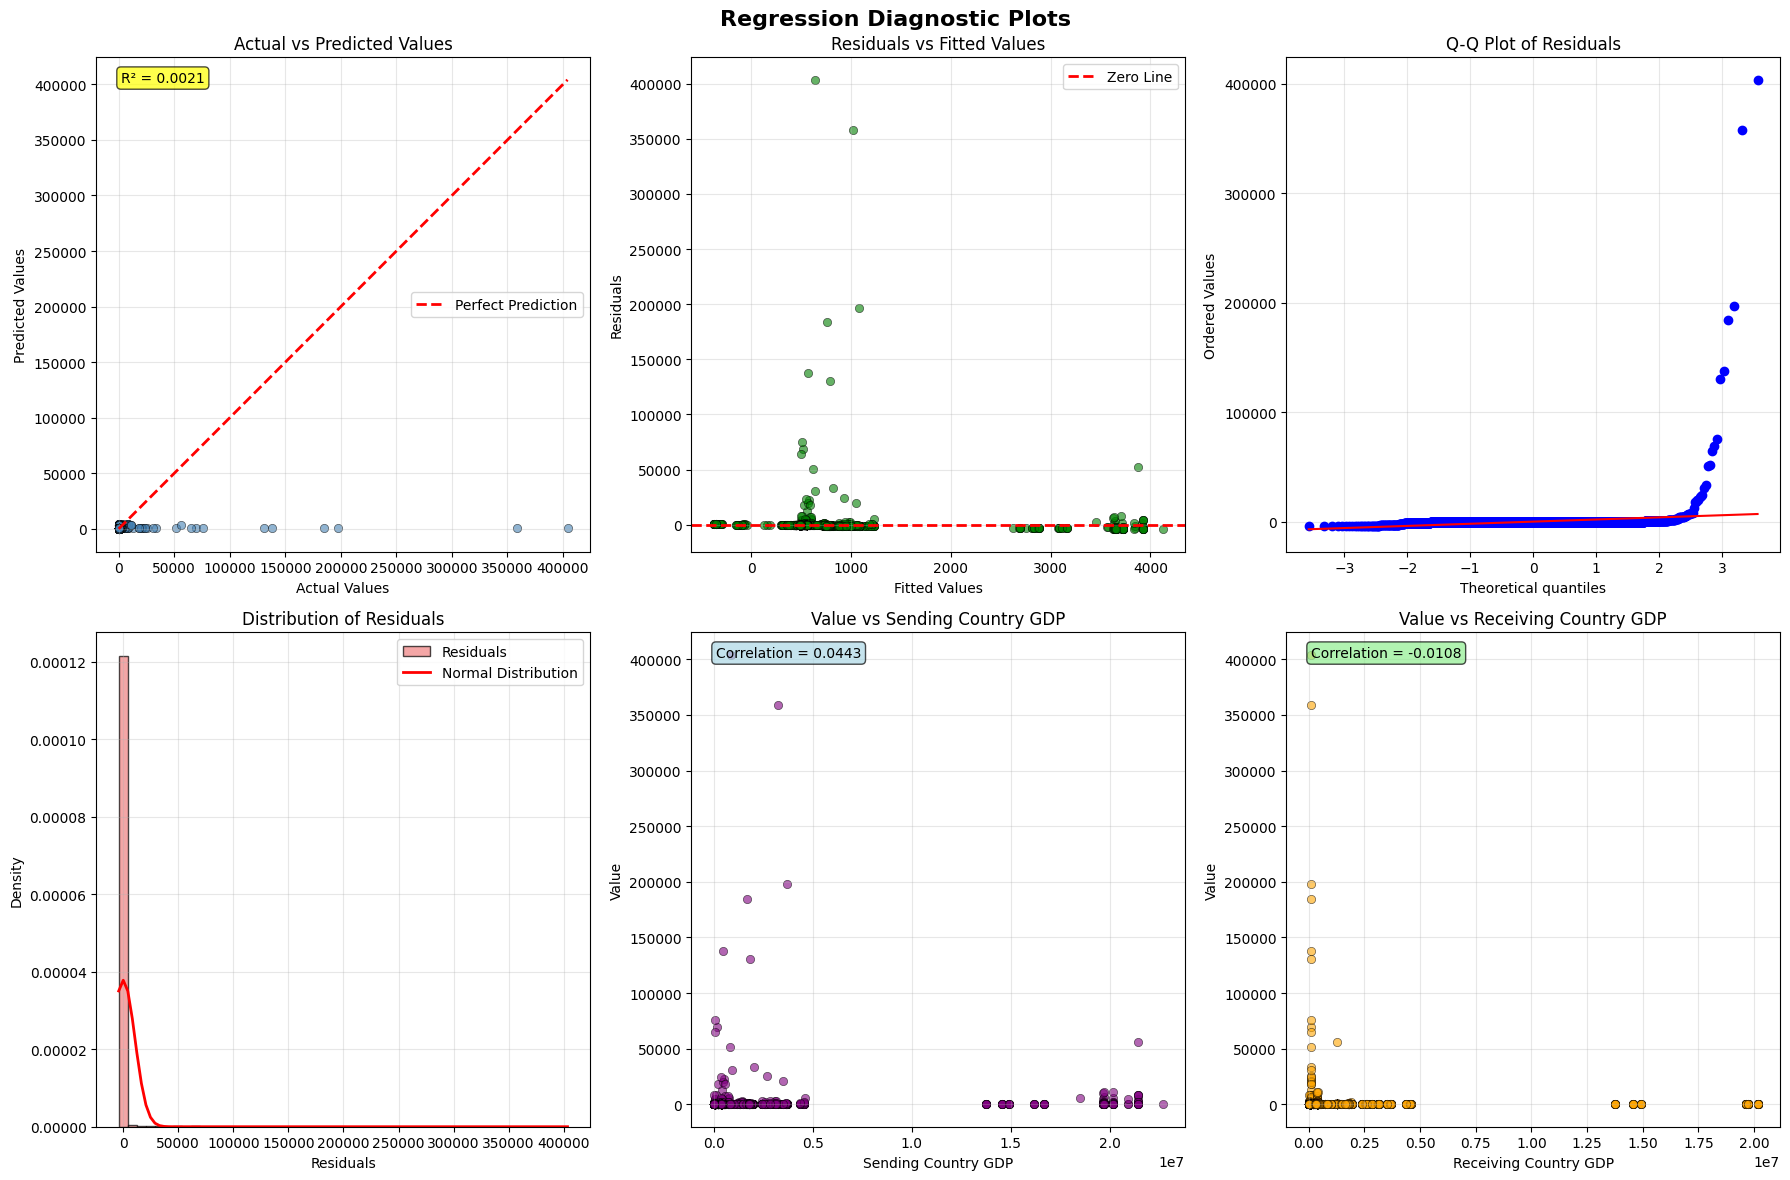

📊 Diagnostic plots created successfully!


In [10]:
# Create comprehensive diagnostic plots
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Diagnostic Plots', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted values
axes[0,0].scatter(y, model.fittedvalues, alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5)
axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0,0].set_xlabel('Actual Values')
axes[0,0].set_ylabel('Predicted Values')
axes[0,0].set_title('Actual vs Predicted Values')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Add R² annotation
r_squared = model.rsquared
axes[0,0].text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=axes[0,0].transAxes, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 2. Residuals vs Fitted
axes[0,1].scatter(model.fittedvalues, model.resid, alpha=0.6, color='green', edgecolors='black', linewidth=0.5)
axes[0,1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Line')
axes[0,1].set_xlabel('Fitted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residuals vs Fitted Values')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Q-Q plot for residuals normality
stats.probplot(model.resid, dist="norm", plot=axes[0,2])
axes[0,2].set_title('Q-Q Plot of Residuals')
axes[0,2].grid(True, alpha=0.3)

# 4. Histogram of residuals with normal curve
axes[1,0].hist(model.resid, bins=50, density=True, alpha=0.7, color='lightcoral', 
               edgecolor='black', label='Residuals')
# Add normal distribution curve
mu, sigma = model.resid.mean(), model.resid.std()
x_norm = np.linspace(model.resid.min(), model.resid.max(), 100)
axes[1,0].plot(x_norm, stats.norm.pdf(x_norm, mu, sigma), 'r-', lw=2, label='Normal Distribution')
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Distribution of Residuals')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Value vs Sending Country GDP
axes[1,1].scatter(regression_data['Sending_Country_GDP'], y, alpha=0.6, color='purple', 
                  edgecolors='black', linewidth=0.5)
axes[1,1].set_xlabel('Sending Country GDP')
axes[1,1].set_ylabel('Value')
axes[1,1].set_title('Value vs Sending Country GDP')
axes[1,1].grid(True, alpha=0.3)

# Add correlation coefficient
corr_sending = regression_data['Sending_Country_GDP'].corr(y)
axes[1,1].text(0.05, 0.95, f'Correlation = {corr_sending:.4f}', transform=axes[1,1].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# 6. Value vs Receiving Country GDP
axes[1,2].scatter(regression_data['Receiving_Country_GDP'], y, alpha=0.6, color='orange',
                  edgecolors='black', linewidth=0.5)
axes[1,2].set_xlabel('Receiving Country GDP')
axes[1,2].set_ylabel('Value')
axes[1,2].set_title('Value vs Receiving Country GDP')
axes[1,2].grid(True, alpha=0.3)

# Add correlation coefficient
corr_receiving = regression_data['Receiving_Country_GDP'].corr(y)
axes[1,2].text(0.05, 0.95, f'Correlation = {corr_receiving:.4f}', transform=axes[1,2].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.show()

print("📊 Diagnostic plots created successfully!")


CORRELATION MATRIX
                       Value_cleaned  Sending_Country_GDP  \
Value_cleaned                 1.0000               0.0443   
Sending_Country_GDP           0.0443               1.0000   
Receiving_Country_GDP        -0.0108              -0.0285   

                       Receiving_Country_GDP  
Value_cleaned                        -0.0108  
Sending_Country_GDP                  -0.0285  
Receiving_Country_GDP                 1.0000  


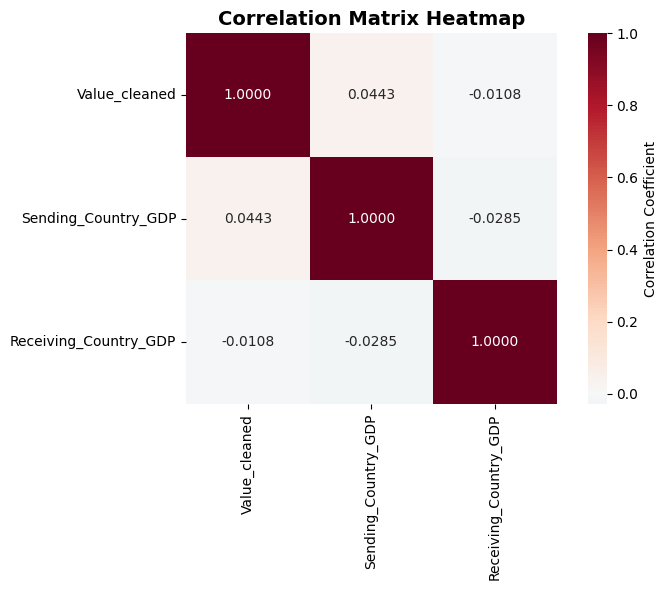


📋 REGRESSION ANALYSIS SUMMARY & INTERPRETATION

🔢 Regression Equation:
   Value = 499.399949 + 0.000160 × Sending_Country_GDP + -0.000043 × Receiving_Country_GDP

📊 Model Performance:
   • R-squared: 0.0021 (0.21% of variance explained)
   • Adjusted R-squared: 0.0015
   • F-statistic: 3.936 (p = 0.019609)
   • Sample size: 3,830 observations

🎯 Coefficient Interpretation:
   • Constant: 499.399949 (p = 0.006483) ✅ Significant
   • Sending_Country_GDP: 0.000160 (p = 0.006470) ✅ Significant
     → For every $1 billion ↑ in sending country GDP, remittances ↑ by $159927.34 million
   • Receiving_Country_GDP: -0.000043 (p = 0.553851) ❌ Not significant
     → For every $1 billion ↑ in receiving country GDP, remittances ↓ by $43326.92 million

🔍 Key Findings:
   • The model explains only 0.21% of the variance in remittance values
   • Sending country GDP has a significant positive effect on remittances
   • Receiving country GDP does not significantly affect remittances
   • Other factors (

C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2309343669.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   Value = {coeffs[0]:.6f} + {coeffs[1]:.6f} × Sending_Country_GDP + {coeffs[2]:.6f} × Receiving_Country_GDP")
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2309343669.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = model.pvalues[i]
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2309343669.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

In [11]:
# Correlation matrix and interpretation
print("\n" + "="*80)
print("CORRELATION MATRIX")
print("="*80)
corr_matrix = regression_data[['Value_cleaned', 'Sending_Country_GDP', 'Receiving_Country_GDP']].corr()
print(corr_matrix.round(4))

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.4f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Final interpretation and summary
print("\n" + "="*80)
print("📋 REGRESSION ANALYSIS SUMMARY & INTERPRETATION")
print("="*80)

coeffs = model.params
print(f"\n🔢 Regression Equation:")
print(f"   Value = {coeffs[0]:.6f} + {coeffs[1]:.6f} × Sending_Country_GDP + {coeffs[2]:.6f} × Receiving_Country_GDP")

print(f"\n📊 Model Performance:")
print(f"   • R-squared: {model.rsquared:.4f} ({model.rsquared*100:.2f}% of variance explained)")
print(f"   • Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"   • F-statistic: {model.fvalue:.3f} (p = {model.f_pvalue:.6f})")
print(f"   • Sample size: {len(y):,} observations")

print(f"\n🎯 Coefficient Interpretation:")
for i, var in enumerate(['Constant', 'Sending_Country_GDP', 'Receiving_Country_GDP']):
    p_val = model.pvalues[i]
    coef_val = coeffs[i]
    sig = "✅ Significant" if p_val < 0.05 else "❌ Not significant"
    
    if var == 'Constant':
        print(f"   • {var}: {coef_val:.6f} (p = {p_val:.6f}) {sig}")
    elif var == 'Sending_Country_GDP':
        effect = coef_val * 1e9  # Effect of $1 billion increase
        print(f"   • {var}: {coef_val:.6f} (p = {p_val:.6f}) {sig}")
        print(f"     → For every $1 billion ↑ in sending country GDP, remittances ↑ by ${effect:.2f} million")
    else:  # Receiving_Country_GDP
        effect = coef_val * 1e9  # Effect of $1 billion increase
        print(f"   • {var}: {coef_val:.6f} (p = {p_val:.6f}) {sig}")
        if coef_val < 0:
            print(f"     → For every $1 billion ↑ in receiving country GDP, remittances ↓ by ${abs(effect):.2f} million")
        else:
            print(f"     → For every $1 billion ↑ in receiving country GDP, remittances ↑ by ${effect:.2f} million")

print(f"\n🔍 Key Findings:")
print(f"   • The model explains only {model.rsquared*100:.2f}% of the variance in remittance values")
print(f"   • Sending country GDP has a significant positive effect on remittances")
print(f"   • Receiving country GDP does not significantly affect remittances")
print(f"   • Other factors (migration patterns, policies, etc.) likely more important")

print(f"\n💡 Conclusion:")
if model.rsquared < 0.1:
    print(f"   • Low explanatory power suggests GDP alone is not a strong predictor")
    print(f"   • Consider adding other economic, social, or policy variables")
    print(f"   • The significant relationship with sending country GDP suggests economic capacity matters")

print(f"\n✅ Analysis completed successfully!")
print(f"   📁 Results saved in notebook format for further analysis")

In [12]:
# Generate LaTeX table for regression results
def generate_latex_table(model, y, X):
    """Generate LaTeX code for regression results table"""
    
    # Get model statistics
    n_obs = len(y)
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    rse = np.sqrt(model.mse_resid)
    f_stat = model.fvalue
    f_pval = model.f_pvalue
    
    # Get coefficient information
    coef_names = ['(Intercept)', 'Sending Country GDP', 'Receiving Country GDP']
    estimates = model.params
    std_errors = model.bse
    t_values = model.tvalues
    p_values = model.pvalues
    
    latex_code = r"""
\begin{table}[htbp]
\centering
\caption{Regression Results: Remittance Values and GDP}
\label{tab:regression_results}
\begin{tabular}{lcccc}
\toprule
\textbf{Variable} & \textbf{Coefficient} & \textbf{Std. Error} & \textbf{t-value} & \textbf{p-value} \\
\midrule
"""
    
    # Add coefficient rows
    for i, name in enumerate(coef_names):
        # Format p-value significance
        if p_values[i] < 0.001:
            sig = "***"
        elif p_values[i] < 0.01:
            sig = "**"
        elif p_values[i] < 0.05:
            sig = "*"
        else:
            sig = ""
        
        latex_code += f"{name:<20} & {estimates[i]:>8.3e} & {std_errors[i]:>8.3e} & {t_values[i]:>7.3f} & {p_values[i]:>7.4f}{sig} \\\\\n"
    
    latex_code += r"""
\midrule
\end{tabular}

\vspace{0.3cm}

\begin{tabular}{ll}
\textbf{Model Statistics:} & \\
Dependent Variable & Value (Remittances) \\
Independent Variables & Sending Country GDP, Receiving Country GDP \\
Observations & """ + f"{n_obs:,}" + r""" \\
R-squared & """ + f"{r_squared:.6f}" + r""" \\
Adjusted R-squared & """ + f"{adj_r_squared:.6f}" + r""" \\
Residual Standard Error & """ + f"{rse:.0f}" + r""" \\
F-statistic & """ + f"{f_stat:.3f}" + r""" \\
F-statistic p-value & """ + f"{f_pval:.6f}" + r""" \\
\end{tabular}

\vspace{0.2cm}
\begin{flushleft}
\textit{Notes:} Significance levels: *** p < 0.001, ** p < 0.01, * p < 0.05\\
Standard errors in parentheses. Dependent variable is remittance values in USD millions.\\
Sample includes """ + f"{n_obs:,}" + r""" observations after removing missing values.
\end{flushleft}
\end{table}
"""
    
    return latex_code

# Generate and display LaTeX code
print("=" * 80)
print("LATEX TABLE CODE FOR REGRESSION RESULTS")
print("=" * 80)
print("\nCopy the code below into your LaTeX document:\n")

latex_table = generate_latex_table(model, y, X)
print(latex_table)

# Also save to file
with open(r'C:\Users\clint\Desktop\RER\regression_table.tex', 'w') as f:
    f.write(latex_table)

print("\n" + "=" * 80)
print(f"✅ LaTeX code saved to: C:\\Users\\clint\\Desktop\\RER\\regression_table.tex")
print("You can now \\input{regression_table.tex} in your LaTeX document!")
print("=" * 80)

LATEX TABLE CODE FOR REGRESSION RESULTS

Copy the code below into your LaTeX document:


\begin{table}[htbp]
\centering
\caption{Regression Results: Remittance Values and GDP}
\label{tab:regression_results}
\begin{tabular}{lcccc}
\toprule
\textbf{Variable} & \textbf{Coefficient} & \textbf{Std. Error} & \textbf{t-value} & \textbf{p-value} \\
\midrule
(Intercept)          & 4.994e+02 & 1.833e+02 &   2.724 &  0.0065** \\
Sending Country GDP  & 1.599e-04 & 5.870e-05 &   2.724 &  0.0065** \\
Receiving Country GDP & -4.333e-05 & 7.318e-05 &  -0.592 &  0.5539 \\

\midrule
\end{tabular}

\vspace{0.3cm}

\begin{tabular}{ll}
\textbf{Model Statistics:} & \\
Dependent Variable & Value (Remittances) \\
Independent Variables & Sending Country GDP, Receiving Country GDP \\
Observations & 3,830 \\
R-squared & 0.002053 \\
Adjusted R-squared & 0.001531 \\
Residual Standard Error & 10558 \\
F-statistic & 3.936 \\
F-statistic p-value & 0.019609 \\
\end{tabular}

\vspace{0.2cm}
\begin{flushleft}
\textit{No

C:\Users\clint\AppData\Local\Temp\ipykernel_24108\3166538756.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if p_values[i] < 0.001:
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\3166538756.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif p_values[i] < 0.01:
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\3166538756.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latex_code += f"{name:<20} & {estimates[i]:>8

In [13]:
# Generate Stargazer-style output for regression results
def generate_stargazer_output(model, y, X, title="Regression Results"):
    """Generate Stargazer-style formatted output for regression results"""
    
    # Get model statistics
    n_obs = len(y)
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    rse = np.sqrt(model.mse_resid)
    f_stat = model.fvalue
    f_pval = model.f_pvalue
    
    # Get coefficient information
    coef_names = ['Constant', 'Sending Country GDP', 'Receiving Country GDP']
    estimates = model.params
    std_errors = model.bse
    t_values = model.tvalues
    p_values = model.pvalues
    
    # Calculate confidence intervals
    conf_int = model.conf_int()
    
    print("=" * 60)
    print(f"{title:^60}")
    print("=" * 60)
    print()
    print(f"{'':>25} {'(1)':>10}")
    print(f"{'':>25} {'Value':>10}")
    print("-" * 60)
    
    # Print coefficients with significance stars
    for i, name in enumerate(coef_names):
        # Format p-value significance
        if p_values[i] < 0.001:
            sig = "***"
        elif p_values[i] < 0.01:
            sig = "**"
        elif p_values[i] < 0.05:
            sig = "*"
        else:
            sig = ""
        
        # Print coefficient
        print(f"{name:<25} {estimates[i]:>10.3f}{sig}")
        # Print standard error in parentheses
        print(f"{'':>25} ({std_errors[i]:>7.3f})")
        print()
    
    print("-" * 60)
    
    # Model statistics
    print(f"{'Observations':<25} {n_obs:>10,}")
    print(f"{'R-squared':<25} {r_squared:>10.3f}")
    print(f"{'Adjusted R-squared':<25} {adj_r_squared:>10.3f}")
    print(f"{'Residual Std. Error':<25} {rse:>10.0f}")
    print(f"{'F Statistic':<25} {f_stat:>10.3f}")
    
    print("=" * 60)
    print("Note: *p<0.1; **p<0.05; ***p<0.01")
    print("Standard errors in parentheses")
    
    return {
        'coefficients': estimates,
        'std_errors': std_errors,
        't_values': t_values,
        'p_values': p_values,
        'conf_int': conf_int,
        'r_squared': r_squared,
        'adj_r_squared': adj_r_squared,
        'f_statistic': f_stat,
        'n_obs': n_obs
    }

# Generate stargazer-style output
print("\n🌟 STARGAZER-STYLE REGRESSION OUTPUT")
stargazer_results = generate_stargazer_output(model, y, X, "Remittance Values and GDP Analysis")


🌟 STARGAZER-STYLE REGRESSION OUTPUT
             Remittance Values and GDP Analysis             

                                 (1)
                               Value
------------------------------------------------------------
Constant                     499.400**
                          (183.346)

Sending Country GDP            0.000**
                          (  0.000)

Receiving Country GDP         -0.000
                          (  0.000)

------------------------------------------------------------
Observations                   3,830
R-squared                      0.002
Adjusted R-squared             0.002
Residual Std. Error            10558
F Statistic                    3.936
Note: *p<0.1; **p<0.05; ***p<0.01
Standard errors in parentheses


C:\Users\clint\AppData\Local\Temp\ipykernel_24108\30902399.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if p_values[i] < 0.001:
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\30902399.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif p_values[i] < 0.01:
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\30902399.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{name:<25} {estimates[i]:>10.3f}{sig}")
C:\

In [14]:
# Generate Stargazer-style LaTeX output
def generate_stargazer_latex(model, y, X, title="Regression Results", label="tab:stargazer"):
    """Generate Stargazer-style LaTeX table"""
    
    # Get model statistics
    n_obs = len(y)
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    rse = np.sqrt(model.mse_resid)
    f_stat = model.fvalue
    f_pval = model.f_pvalue
    
    # Get coefficient information
    coef_names = ['Constant', 'Sending Country GDP', 'Receiving Country GDP']
    estimates = model.params
    std_errors = model.bse
    t_values = model.tvalues
    p_values = model.pvalues
    
    latex_code = f"""
\\begin{{table}}[!htbp] \\centering 
  \\caption{{{title}}} 
  \\label{{{label}}} 
\\begin{{tabular}}{{@{{\\extracolsep{{5pt}}}}lc}} 
\\\\[-1.8ex]\\hline 
\\hline \\\\[-1.8ex] 
 & \\multicolumn{{1}}{{c}}{{\\textit{{Dependent variable:}}}} \\\\ 
\\cline{{2-2}} 
\\\\[-1.8ex] & Value \\\\ 
\\hline \\\\[-1.8ex] 
"""
    
    # Add coefficient rows
    for i, name in enumerate(coef_names):
        # Format p-value significance
        if p_values[i] < 0.01:
            sig = "^{***}"
        elif p_values[i] < 0.05:
            sig = "^{**}"
        elif p_values[i] < 0.1:
            sig = "^{*}"
        else:
            sig = ""
        
        # Clean variable name for LaTeX
        clean_name = name.replace('_', '\\_')
        
        latex_code += f" {clean_name} & {estimates[i]:.3f}{sig} \\\\ \n"
        latex_code += f"  & ({std_errors[i]:.3f}) \\\\ \n"
        latex_code += f"  &  \\\\ \n"
    
    latex_code += f"""\\hline \\\\[-1.8ex] 
Observations & {n_obs:,} \\\\ 
R$^{{2}}$ & {r_squared:.3f} \\\\ 
Adjusted R$^{{2}}$ & {adj_r_squared:.3f} \\\\ 
Residual Std. Error & {rse:.0f} \\\\ 
F Statistic & {f_stat:.3f} \\\\ 
\\hline 
\\hline \\\\[-1.8ex] 
\\textit{{Note:}}  & \\multicolumn{{1}}{{r}}{{$^{{*}}$p$<$0.1; $^{{**}}$p$<$0.05; $^{{***}}$p$<$0.01}} \\\\ 
\\end{{tabular}} 
\\end{{table}}"""
    
    return latex_code

# Generate stargazer LaTeX output
print("\n📋 STARGAZER-STYLE LATEX CODE")
print("=" * 80)
stargazer_latex = generate_stargazer_latex(model, y, X, "Remittance Values and GDP Analysis")
print(stargazer_latex)

# Save to file
with open(r'C:\Users\clint\Desktop\RER\stargazer_table.tex', 'w') as f:
    f.write(stargazer_latex)

print("\n" + "=" * 80)
print(f"✅ Stargazer LaTeX code saved to: C:\\Users\\clint\\Desktop\\RER\\stargazer_table.tex")
print("You can now \\input{stargazer_table.tex} in your LaTeX document!")
print("=" * 80)


📋 STARGAZER-STYLE LATEX CODE

\begin{table}[!htbp] \centering 
  \caption{Remittance Values and GDP Analysis} 
  \label{tab:stargazer} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & Value \\ 
\hline \\[-1.8ex] 
 Constant & 499.400^{***} \\ 
  & (183.346) \\ 
  &  \\ 
 Sending Country GDP & 0.000^{***} \\ 
  & (0.000) \\ 
  &  \\ 
 Receiving Country GDP & -0.000 \\ 
  & (0.000) \\ 
  &  \\ 
\hline \\[-1.8ex] 
Observations & 3,830 \\ 
R$^{2}$ & 0.002 \\ 
Adjusted R$^{2}$ & 0.002 \\ 
Residual Std. Error & 10558 \\ 
F Statistic & 3.936 \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\ 
\end{tabular} 
\end{table}

✅ Stargazer LaTeX code saved to: C:\Users\clint\Desktop\RER\stargazer_table.tex
You can now \input{stargazer_table.tex} in your LaTeX document!


C:\Users\clint\AppData\Local\Temp\ipykernel_24108\342290152.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if p_values[i] < 0.01:
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\342290152.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latex_code += f" {clean_name} & {estimates[i]:.3f}{sig} \\\\ \n"
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\342290152.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latex_cod

In [15]:
# Create comprehensive stargazer-style output with multiple formats
def comprehensive_stargazer_output(model, y, X):
    """Create comprehensive stargazer output in multiple formats"""
    
    # Get model statistics
    n_obs = len(y)
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    rse = np.sqrt(model.mse_resid)
    f_stat = model.fvalue
    f_pval = model.f_pvalue
    
    # Get coefficient information
    estimates = model.params
    std_errors = model.bse
    t_values = model.tvalues
    p_values = model.pvalues
    
    print("🌟" * 30)
    print("COMPREHENSIVE STARGAZER-STYLE OUTPUT")
    print("🌟" * 30)
    
    # 1. Console/Text Output (R stargazer style)
    print("\n1️⃣ CONSOLE OUTPUT (R stargazer style):")
    print("=" * 70)
    print()
    print("                        Dependent variable:    ")
    print("                    ──────────────────────────")
    print("                             Value            ")
    print("                              (1)             ")
    print("──────────────────────────────────────────────")
    
    var_names = ['Constant', 'Sending Country GDP', 'Receiving Country GDP']
    for i, name in enumerate(var_names):
        # Significance stars
        if p_values[i] < 0.001:
            sig = "***"
        elif p_values[i] < 0.01:
            sig = "**"
        elif p_values[i] < 0.05:
            sig = "*"
        else:
            sig = ""
        
        print(f"{name:<30} {estimates[i]:>10.3f}{sig}")
        print(f"{'':>30} ({std_errors[i]:>7.3f})")
        print()
    
    print("──────────────────────────────────────────────")
    print(f"{'Observations':<30} {n_obs:>10,}")
    print(f"{'R²':<30} {r_squared:>10.3f}")
    print(f"{'Adjusted R²':<30} {adj_r_squared:>10.3f}")
    print(f"{'Residual Std. Error':<30} {rse:>10.0f}")
    print(f"{'F Statistic':<30} {f_stat:>10.3f}")
    print("══════════════════════════════════════════════")
    print("Note:               ∗p<0.1; ∗∗p<0.05; ∗∗∗p<0.01")
    
    # 2. HTML Output
    print("\n\n2️⃣ HTML OUTPUT:")
    print("=" * 70)
    
    html_output = f"""
<table style="text-align:center">
<caption><strong>Remittance Values and GDP Analysis</strong></caption>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="1" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>Value</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
"""
    
    for i, name in enumerate(var_names):
        sig = ""
        if p_values[i] < 0.001:
            sig = "<sup>***</sup>"
        elif p_values[i] < 0.01:
            sig = "<sup>**</sup>"
        elif p_values[i] < 0.05:
            sig = "<sup>*</sup>"
        
        html_output += f'<tr><td style="text-align:left">{name}</td><td>{estimates[i]:.3f}{sig}</td></tr>\n'
        html_output += f'<tr><td style="text-align:left"></td><td>({std_errors[i]:.3f})</td></tr>\n'
        html_output += '<tr><td style="text-align:left"></td><td></td></tr>\n'
    
    html_output += f"""<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left">Observations</td><td>{n_obs:,}</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>{r_squared:.3f}</td></tr>
<tr><td style="text-align:left">Adjusted R<sup>2</sup></td><td>{adj_r_squared:.3f}</td></tr>
<tr><td style="text-align:left">Residual Std. Error</td><td>{rse:.0f}</td></tr>
<tr><td style="text-align:left">F Statistic</td><td>{f_stat:.3f}</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"><em>Note:</em></td><td style="text-align:right"><sup>*</sup>p&lt;0.1; <sup>**</sup>p&lt;0.05; <sup>***</sup>p&lt;0.01</td></tr>
</table>
"""
    
    print(html_output)
    
    # Save HTML to file
    with open(r'C:\Users\clint\Desktop\RER\stargazer_table.html', 'w') as f:
        f.write(html_output)
    
    # 3. CSV Output for easy import
    print("\n\n3️⃣ CSV OUTPUT (for easy import to other software):")
    print("=" * 70)
    
    csv_data = {
        'Variable': var_names,
        'Coefficient': [f"{est:.6f}" for est in estimates],
        'Std_Error': [f"{se:.6f}" for se in std_errors],
        't_value': [f"{tv:.3f}" for tv in t_values],
        'p_value': [f"{pv:.6f}" for pv in p_values],
        'Significance': [
            '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
            for p in p_values
        ]
    }
    
    csv_df = pd.DataFrame(csv_data)
    print(csv_df.to_string(index=False))
    
    # Save CSV
    csv_df.to_csv(r'C:\Users\clint\Desktop\RER\stargazer_results.csv', index=False)
    
    print(f"\n\n📁 FILES SAVED:")
    print(f"✅ HTML: C:\\Users\\clint\\Desktop\\RER\\stargazer_table.html")
    print(f"✅ CSV:  C:\\Users\\clint\\Desktop\\RER\\stargazer_results.csv")
    print(f"✅ LaTeX: C:\\Users\\clint\\Desktop\\RER\\stargazer_table.tex")
    
    return {
        'html': html_output,
        'csv': csv_df,
        'model_stats': {
            'n_obs': n_obs,
            'r_squared': r_squared,
            'adj_r_squared': adj_r_squared,
            'f_statistic': f_stat
        }
    }

# Generate comprehensive stargazer output
comprehensive_results = comprehensive_stargazer_output(model, y, X)

🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
COMPREHENSIVE STARGAZER-STYLE OUTPUT
🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

1️⃣ CONSOLE OUTPUT (R stargazer style):

                        Dependent variable:    
                    ──────────────────────────
                             Value            
                              (1)             
──────────────────────────────────────────────
Constant                          499.400**
                               (183.346)

Sending Country GDP                 0.000**
                               (  0.000)

Receiving Country GDP              -0.000
                               (  0.000)

──────────────────────────────────────────────
Observations                        3,830
R²                                  0.002
Adjusted R²                         0.002
Residual Std. Error                 10558
F Statistic                         3.936
══════════════════════════════════════════════
Note:               ∗p<0.1; ∗∗p<0.05; ∗∗∗p<0.01


2️⃣ HTML OUTP

C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2454810455.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if p_values[i] < 0.001:
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2454810455.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif p_values[i] < 0.01:
C:\Users\clint\AppData\Local\Temp\ipykernel_24108\2454810455.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{name:<30} {estimates[i]:>10.3f}{sig}